In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
movie_dataset = pd.read_csv("resources/movie_metadata.csv")
movies = movie_dataset[["num_critic_for_reviews", "director_facebook_likes", "actor_3_facebook_likes", "actor_1_facebook_likes", "gross", "num_voted_users", "cast_total_facebook_likes", "num_user_for_reviews", "content_rating", "budget", "actor_2_facebook_likes", "movie_facebook_likes", "imdb_score", "duration", "genres"]]
# movies = movie_dataset[["num_critic_for_reviews", "director_facebook_likes", "actor_3_facebook_likes", "actor_1_facebook_likes", "gross", "num_voted_users", "cast_total_facebook_likes", "num_user_for_reviews", "content_rating", "budget", "actor_2_facebook_likes", "movie_facebook_likes", "imdb_score", "duration"]]
movies = movies.dropna(how="any")
movies.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,imdb_score,duration,genres
0,723.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,PG-13,237000000.0,936.0,33000,7.9,178.0,Action|Adventure|Fantasy|Sci-Fi
1,302.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,PG-13,300000000.0,5000.0,0,7.1,169.0,Action|Adventure|Fantasy
2,602.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,PG-13,245000000.0,393.0,85000,6.8,148.0,Action|Adventure|Thriller
3,813.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,PG-13,250000000.0,23000.0,164000,8.5,164.0,Action|Thriller
5,462.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,PG-13,263700000.0,632.0,24000,6.6,132.0,Action|Adventure|Sci-Fi


In [3]:
genres = movies["genres"].str.get_dummies(sep='|')
genres.head()


# Break up the big genre string into a string array
# movie_dataset['genres'] = movie_dataset['genres'].str.split('|')
# movie_dataset['genres'].value_counts()

# Convert genres to string value
#movie_dataset['genres'] = movie_dataset['genres'].fillna("").astype('str')
#movie_dataset.genres.apply(pd.Series)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
movies = movies.drop("genres", axis=1)
movies_df = genres \
    .merge(movies, left_index = True, right_index = True)
#movies_df = pd.merge(movies, hey, left_index=True, right_index=True)

movies_df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,imdb_score,duration
0,1,1,0,0,0,0,0,0,0,1,...,760505847.0,886204,4834,3054.0,PG-13,237000000.0,936.0,33000,7.9,178.0
1,1,1,0,0,0,0,0,0,0,1,...,309404152.0,471220,48350,1238.0,PG-13,300000000.0,5000.0,0,7.1,169.0
2,1,1,0,0,0,0,0,0,0,0,...,200074175.0,275868,11700,994.0,PG-13,245000000.0,393.0,85000,6.8,148.0
3,1,0,0,0,0,0,0,0,0,0,...,448130642.0,1144337,106759,2701.0,PG-13,250000000.0,23000.0,164000,8.5,164.0
5,1,1,0,0,0,0,0,0,0,0,...,73058679.0,212204,1873,738.0,PG-13,263700000.0,632.0,24000,6.6,132.0


In [5]:
movies_df.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'num_critic_for_reviews',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'num_user_for_reviews', 'content_rating',
       'budget', 'actor_2_facebook_likes', 'movie_facebook_likes',
       'imdb_score', 'duration'],
      dtype='object')

In [6]:
X = movies_df.drop("gross", axis=1)
y = movies_df['gross']
# y = movies_df["gross"].values.reshape(-1, 1)


In [7]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'num_critic_for_reviews',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'num_user_for_reviews', 'budget',
       'actor_2_facebook_likes', 'movie_facebook_likes', 'imdb_score',
       'duration', 'content_rating_Approved', 'content_rating_G',
       'content_rating_GP', 'content_rating_M', 'content_rating_NC-17',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_Passed', 'content_rating_R', 'content_rating_Unrated',
       'content_rating_X'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, y, random_state=42)

X_train.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
4028,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2979,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
795,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1363,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3468,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
# y_scaler = MinMaxScaler().fit(y_train)

In [10]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=8, random_state=42, n_estimators=300)
regr.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.predict(X_train_scaled)

NameError: name 'X_train_scaled' is not defined

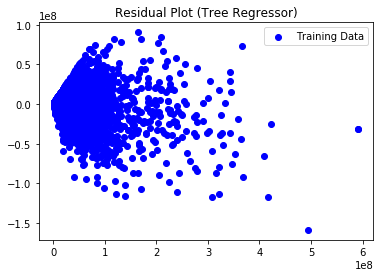

In [12]:
plt.scatter(regr.predict(X_train), regr.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot (Tree Regressor)")
plt.show()

In [13]:
pd.DataFrame({'Feature': X_train.columns, 'Importances': regr.feature_importances_}).sort_values(by='Importances', ascending=False)

,Feature,Importances
26,num_voted_users,0.487037
29,budget,0.200770
1,Adventure,0.040616
22,num_critic_for_reviews,0.037155
31,movie_facebook_likes,0.030633
8,Family,0.027095
28,num_user_for_reviews,0.025957
32,imdb_score,0.017947
43,content_rating_R,0.017179
33,duration,0.014347


In [19]:
# Plot the results 
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Residual Plot")
# plt.show()

In [20]:
training_score = regr.score(X_train, y_train)
testing_score = regr.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8784486886140123
Testing Score: 0.708492191994152


In [21]:
from sklearn.metrics import mean_squared_error

predictions = regr.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = regr.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1704897272771342.5, R2: 0.708492191994152


In [22]:
df = pd.DataFrame({"Actual": y_test, "Predicted": predictions})

In [23]:
new = pd.merge(df, movies, left_index=True, right_index=True)
new

,Actual,Predicted,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,imdb_score,duration
2555,37300107.0,2.137200e+07,138.0,26.0,638.0,3000.0,37300107.0,29147,5349,115.0,PG-13,16000000.0,1000.0,0,4.8,91.0
2623,73326666.0,8.938839e+07,109.0,13000.0,217.0,925.0,73326666.0,189413,1953,306.0,PG,15000000.0,692.0,15000,7.5,92.0
4312,198407.0,2.804078e+06,78.0,38.0,85.0,363.0,198407.0,10282,774,78.0,R,2000000.0,223.0,474,6.6,96.0
3079,56715371.0,1.245859e+08,285.0,0.0,73.0,273.0,56715371.0,427357,727,1736.0,G,12000000.0,117.0,24000,8.3,161.0
3315,883887.0,3.859176e+06,26.0,3.0,204.0,679.0,883887.0,1201,1426,14.0,PG,9000000.0,537.0,0,6.2,97.0
1223,66466372.0,4.085743e+07,221.0,160.0,748.0,164000.0,66466372.0,75345,303717,290.0,R,40000000.0,137000.0,0,5.2,82.0
686,17218080.0,4.348455e+07,60.0,36.0,554.0,13000.0,17218080.0,43376,15944,249.0,R,70000000.0,773.0,0,5.7,100.0
4044,5776314.0,1.809894e+07,261.0,101.0,157.0,1000.0,5776314.0,73349,2016,142.0,R,3200000.0,394.0,15000,7.2,105.0
2270,13801755.0,2.381113e+07,34.0,36.0,507.0,13000.0,13801755.0,23928,15183,100.0,PG,20000000.0,828.0,0,6.6,94.0
1859,1075288.0,1.432781e+07,42.0,30.0,223.0,1000.0,1075288.0,7772,2228,55.0,R,22000000.0,854.0,145,6.1,101.0
